In [73]:
import numpy as np
from numpy.ma.core import arctan2


def rotate(x, y, alpha):
    x_rot = x * np.cos(alpha) - y * np.sin(alpha)
    y_rot = x * np.sin(alpha) + y * np.cos(alpha)
    return x_rot, y_rot
def get_Point_in_ellipse(a, b, theta):
    return a * np.cos(theta) , b * np.sin(theta)

def Point_in_ellipse(h, k, a, b, alpha, theta):
    x0, y0 = np.cos(theta), np.sin(theta)
    x_real_rot, y_real_rot = rotate(x0, y0, -alpha)
    x_real_rot, y_real_rot = get_Point_in_ellipse(a, b, np.arctan2(y_real_rot, x_real_rot))
    x_res, y_res = rotate(x_real_rot, y_real_rot, alpha)
    return x_res + h, y_res + k



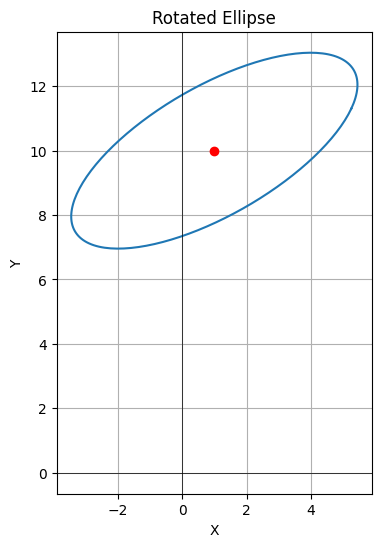

In [74]:
import numpy as np
import matplotlib.pyplot as plt






# 定义椭圆参数
h = 1        # 椭圆中心 x 坐标
k = 10# 椭圆中心 y 坐标
a = 5        # 半长轴
b = 2        # 半短轴
alpha = np.pi/6 # 旋转角度，弧度（45度）
theta_values = np.linspace(0, np.pi * 2  , 200)  # 在 0 到 2π 之间取 100 个角度点

# 计算椭圆上的点
x_points = []
y_points = []

for theta in theta_values:
    x, y = Point_in_ellipse(h, k, a, b,alpha, theta)
    x_points.append(x)
    y_points.append(y)


plt.figure(figsize=(6, 6))
plt.plot(x_points, y_points, label='Rotated Ellipse')
plt.scatter(h, k, color='red', label='Center (h, k)', zorder=5)  # 中心点


# x0, y0 = 0, 4
# plt.scatter(x0, y0, color='red', label='Center (h, k)', zorder=5)  # 中心点
#
# x_r, y_r = Point_in_ellipse(h, k, a, b, alpha, np.arctan2(y0, x0))
# plt.scatter(x_r, y_r, color='red', label='Center (h, k)', zorder=5)  # 中心点

plt.axhline(0, color='black',linewidth=0.5)  # x 轴
plt.axvline(0, color='black',linewidth=0.5)  # y 轴
plt.gca().set_aspect('equal', adjustable='box')  # 保证坐标轴比例一致
plt.title("Rotated Ellipse")
plt.xlabel("X")
plt.ylabel("Y")
# plt.legend()
plt.grid(True)
plt.show()
